In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
laptop_data = pd.read_csv('/Users/rasmus/pluralsight/data/laptops.csv',encoding="ISO-8859-1")

In [14]:
laptop_data.drop(['Product','ScreenResolution','Cpu','Memory','Gpu','Weight'],inplace=True,axis=1)

In [18]:
laptop_data.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

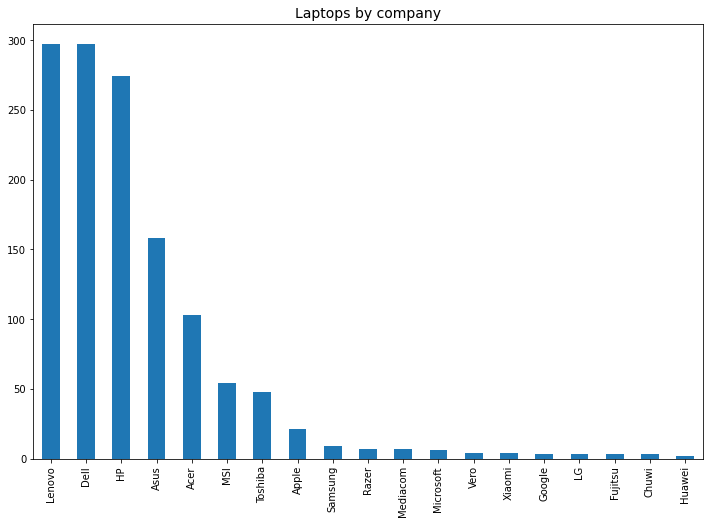

In [19]:
plt.figure(figsize=(12,8))
laptop_data['Company'].value_counts().plot.bar()
plt.title('Laptops by company',fontsize=14)
plt.show()

<Figure size 1008x576 with 0 Axes>

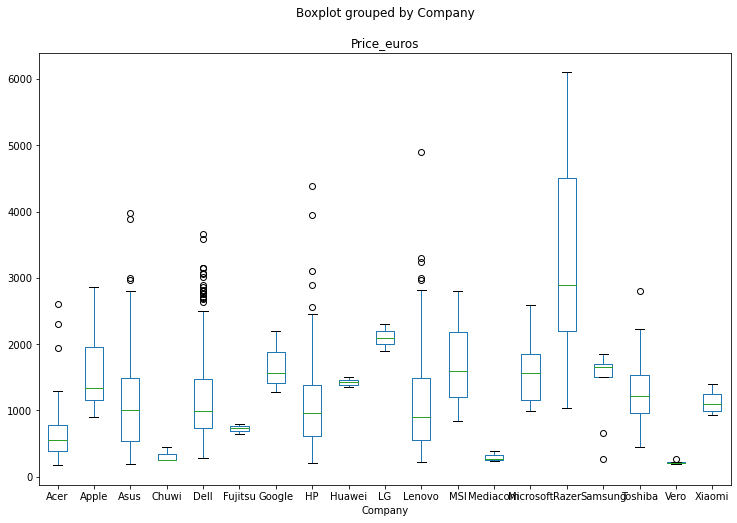

In [23]:
plt.figure(figsize=(14,8))
laptop_data.boxplot(by='Company',column=['Price_euros'],grid=False,figsize=(12,8))

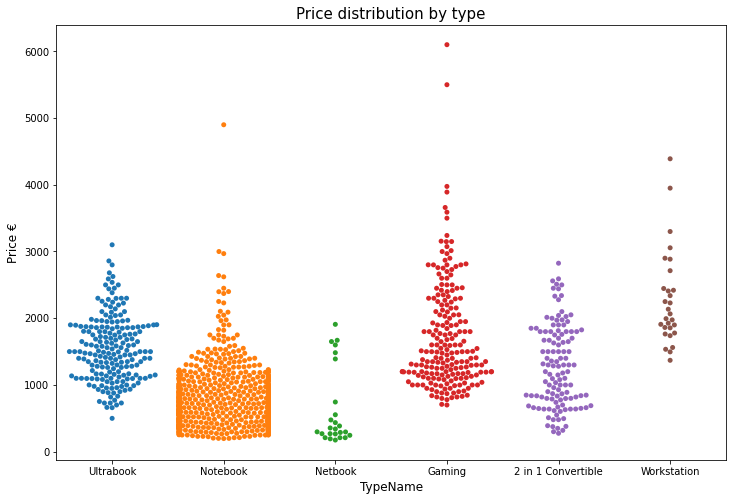

In [28]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='TypeName',y='Price_euros',data=laptop_data)
plt.title('Price distribution by type',fontsize=15)
plt.xlabel('TypeName',fontsize=12)
plt.ylabel('Price €',fontsize=12)
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])

In [33]:
dummy_laptop_data = pd.get_dummies(laptop_data)

In [35]:
dummy_laptop_data.shape

(1303, 41)

In [38]:
X=dummy_laptop_data.drop('Price_euros',axis=1)

In [41]:
Y=dummy_laptop_data['Price_euros']

In [42]:
Y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_regression = LinearRegression()
linear_regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
linear_regression.score(X_train,Y_train)

0.6868870206068272

In [49]:
Y_pred = linear_regression.predict(X_test)

In [54]:
r2_score(Y_test,Y_pred)

0.6268140290012917

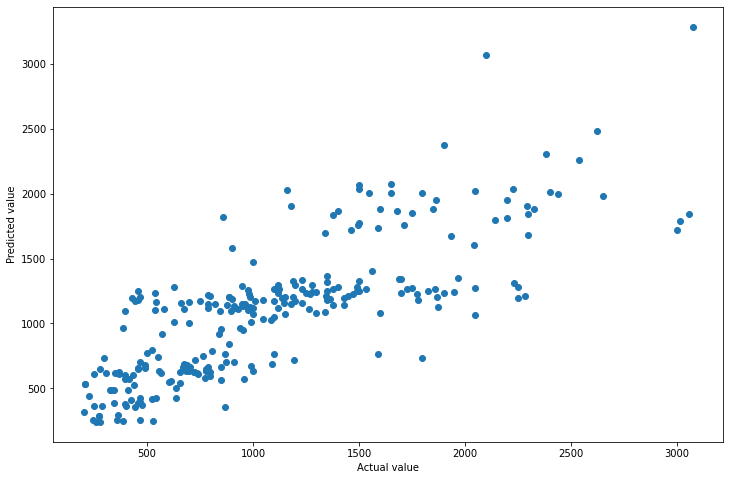

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()